In [ ]:
#pip install featurewiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  datetime import datetime
from sklearn.linear_model import LinearRegression
import datetime as dt
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import math 
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from featurewiz import featurewiz
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold


Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
#Datos Balanceados
caractNucleo = pd.read_csv('NUCLEOUNET/caractNucleoUnetBinBal2.csv',sep=';',index_col=0)
caractCito = pd.read_csv('CITOUNET/caractCitoUnetBinBal2.csv',sep=';',index_col=0)

In [3]:

for i,e in enumerate(caractNucleo.columns):
    nombre = 'n'+e
    caractNucleo.rename(columns={e:nombre},inplace=True)
    
caract = pd.DataFrame()
caract = pd.concat([caractNucleo,caractCito],axis=1)

caract['NC']= caractNucleo['nAREA']/caractCito['AREA']

caract.drop(columns=['nCLASE','nCELULA'],inplace=True)

In [4]:
# tres clases, citología
#normal, lsil,hsil
cytology = []
for ind, ele in enumerate(caract['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
        #1 NORMAL
         cytology.append(1)
    if ele == 4:
        #2 LSIL
        cytology.append(2)
    if ele == 5 or ele == 6 or ele == 7:
        #3 HSIL
        cytology.append(3)
caract['CYT'] = cytology


# cuatro  clases
#normal, CIN1,CIN2,CIN3
histology = []
for ind, ele in enumerate(caract['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
        #1 NORMAL
         histology.append(1)
    if ele == 4:
        #2 CIN1
        histology.append(2)
    if ele == 5:
        #3 CIN2
        histology.append(3)
    if ele == 6 or ele == 7:
        #4 CIN3
        histology.append(4)
caract['HIST'] = histology

# DOS CLASES
# dos clases, clasificacion binaria
#normal, lsil,hsil
binario = []
for ind, ele in enumerate(caract['CLASE']):
    if ele == 1 or ele == 2 or ele == 3:
         binario.append(1)
    if ele == 4 or ele == 5 or ele == 6 or ele == 7:
        binario.append(2)
caract['BIN'] = binario

In [ ]:
plt.figure(figsize=(7,3),dpi=98)
sns.countplot(x='CLASE',data=caract)
plt.xlabel('Clases')
plt.ylabel('Observaciones')
plt.title('Cantidad de imágenes por clase')

In [ ]:
plt.figure(figsize=(7,3),dpi=98)
sns.countplot(x='BIN',data=caract)
plt.xlabel('Clases')
plt.ylabel('Observaciones')
plt.title('Cantidad de imágenes por clase')

In [ ]:
c1 = caract['BIN']==1
c2 = caract['BIN']==2
print('Total C1--->',c1.sum(),'  Total C2--->',c2.sum())

In [ ]:
lista = caract.columns.drop(['CYT','BIN', 'HIST','CELULA','CLASE'])
for c in lista:
    plt.figure(figsize=(7,3),dpi=98)
    sns.set(style='whitegrid')
    sns.boxplot(x="BIN",y=c,data=caract)
    plt.title('DIAGRAMA DE CAJAS')
    plt.show()

In [5]:
# CARACTERISTICAS A ESTANDARIZAR
matrizCaract = caract[caract.columns.drop(['BIN','HIST','CYT','CLASE','CELULA'])]
matrizCaract = pd.DataFrame(RobustScaler().fit_transform(matrizCaract),columns=caract.columns.drop(['BIN','HIST','CYT','CLASE','CELULA']))

matrizCaract['HERLEV'] = caract['CLASE']
matrizCaract['BIN'] = caract['BIN']
matrizCaract['CYT'] = caract['CYT']
matrizCaract['HIST'] = caract['HIST']


In [ ]:
matrizCaract.columns

'CORRELACION3', 'EXTENSION', 'RELACION', 'ENERGIA3', 'RADIO', 'SOLIDEZ', 'RELACIONFERET'
'CORRELACION', 'RADIO', 'ENTROPIA', 'DISIMILITUD2', 'BRILLO', 'EJE2', 'CORRELACION3', 'ASM3', 'DIAMEQUI', 'SOLIDEZ'

In [ ]:
# #caracteriticas del nucleo
# varN = ['nCORRELACION3', 'nEXTENSION', 'nRELACION', 'nENERGIA3', 'nRADIO', 'nSOLIDEZ', 'nRELACIONFERET']
# #caracteriticas del citolplasma
# varC =  ['CORRELACION', 'RADIO', 'ENTROPIA', 'DISIMILITUD2', 'BRILLO', 'EJE2', 'CORRELACION3', 'ASM3', 'DIAMEQUI', 'SOLIDEZ']
# #relacion nucleo citoplasma
# varNC = ['NC']
# #clases
# varClas = ['HERLEV','CYT','HIST','BIN']
# caract = varN+varC+varNC+varClas
# matrizCaract = matrizCaract[caract]


In [ ]:
matrizCaract.columns

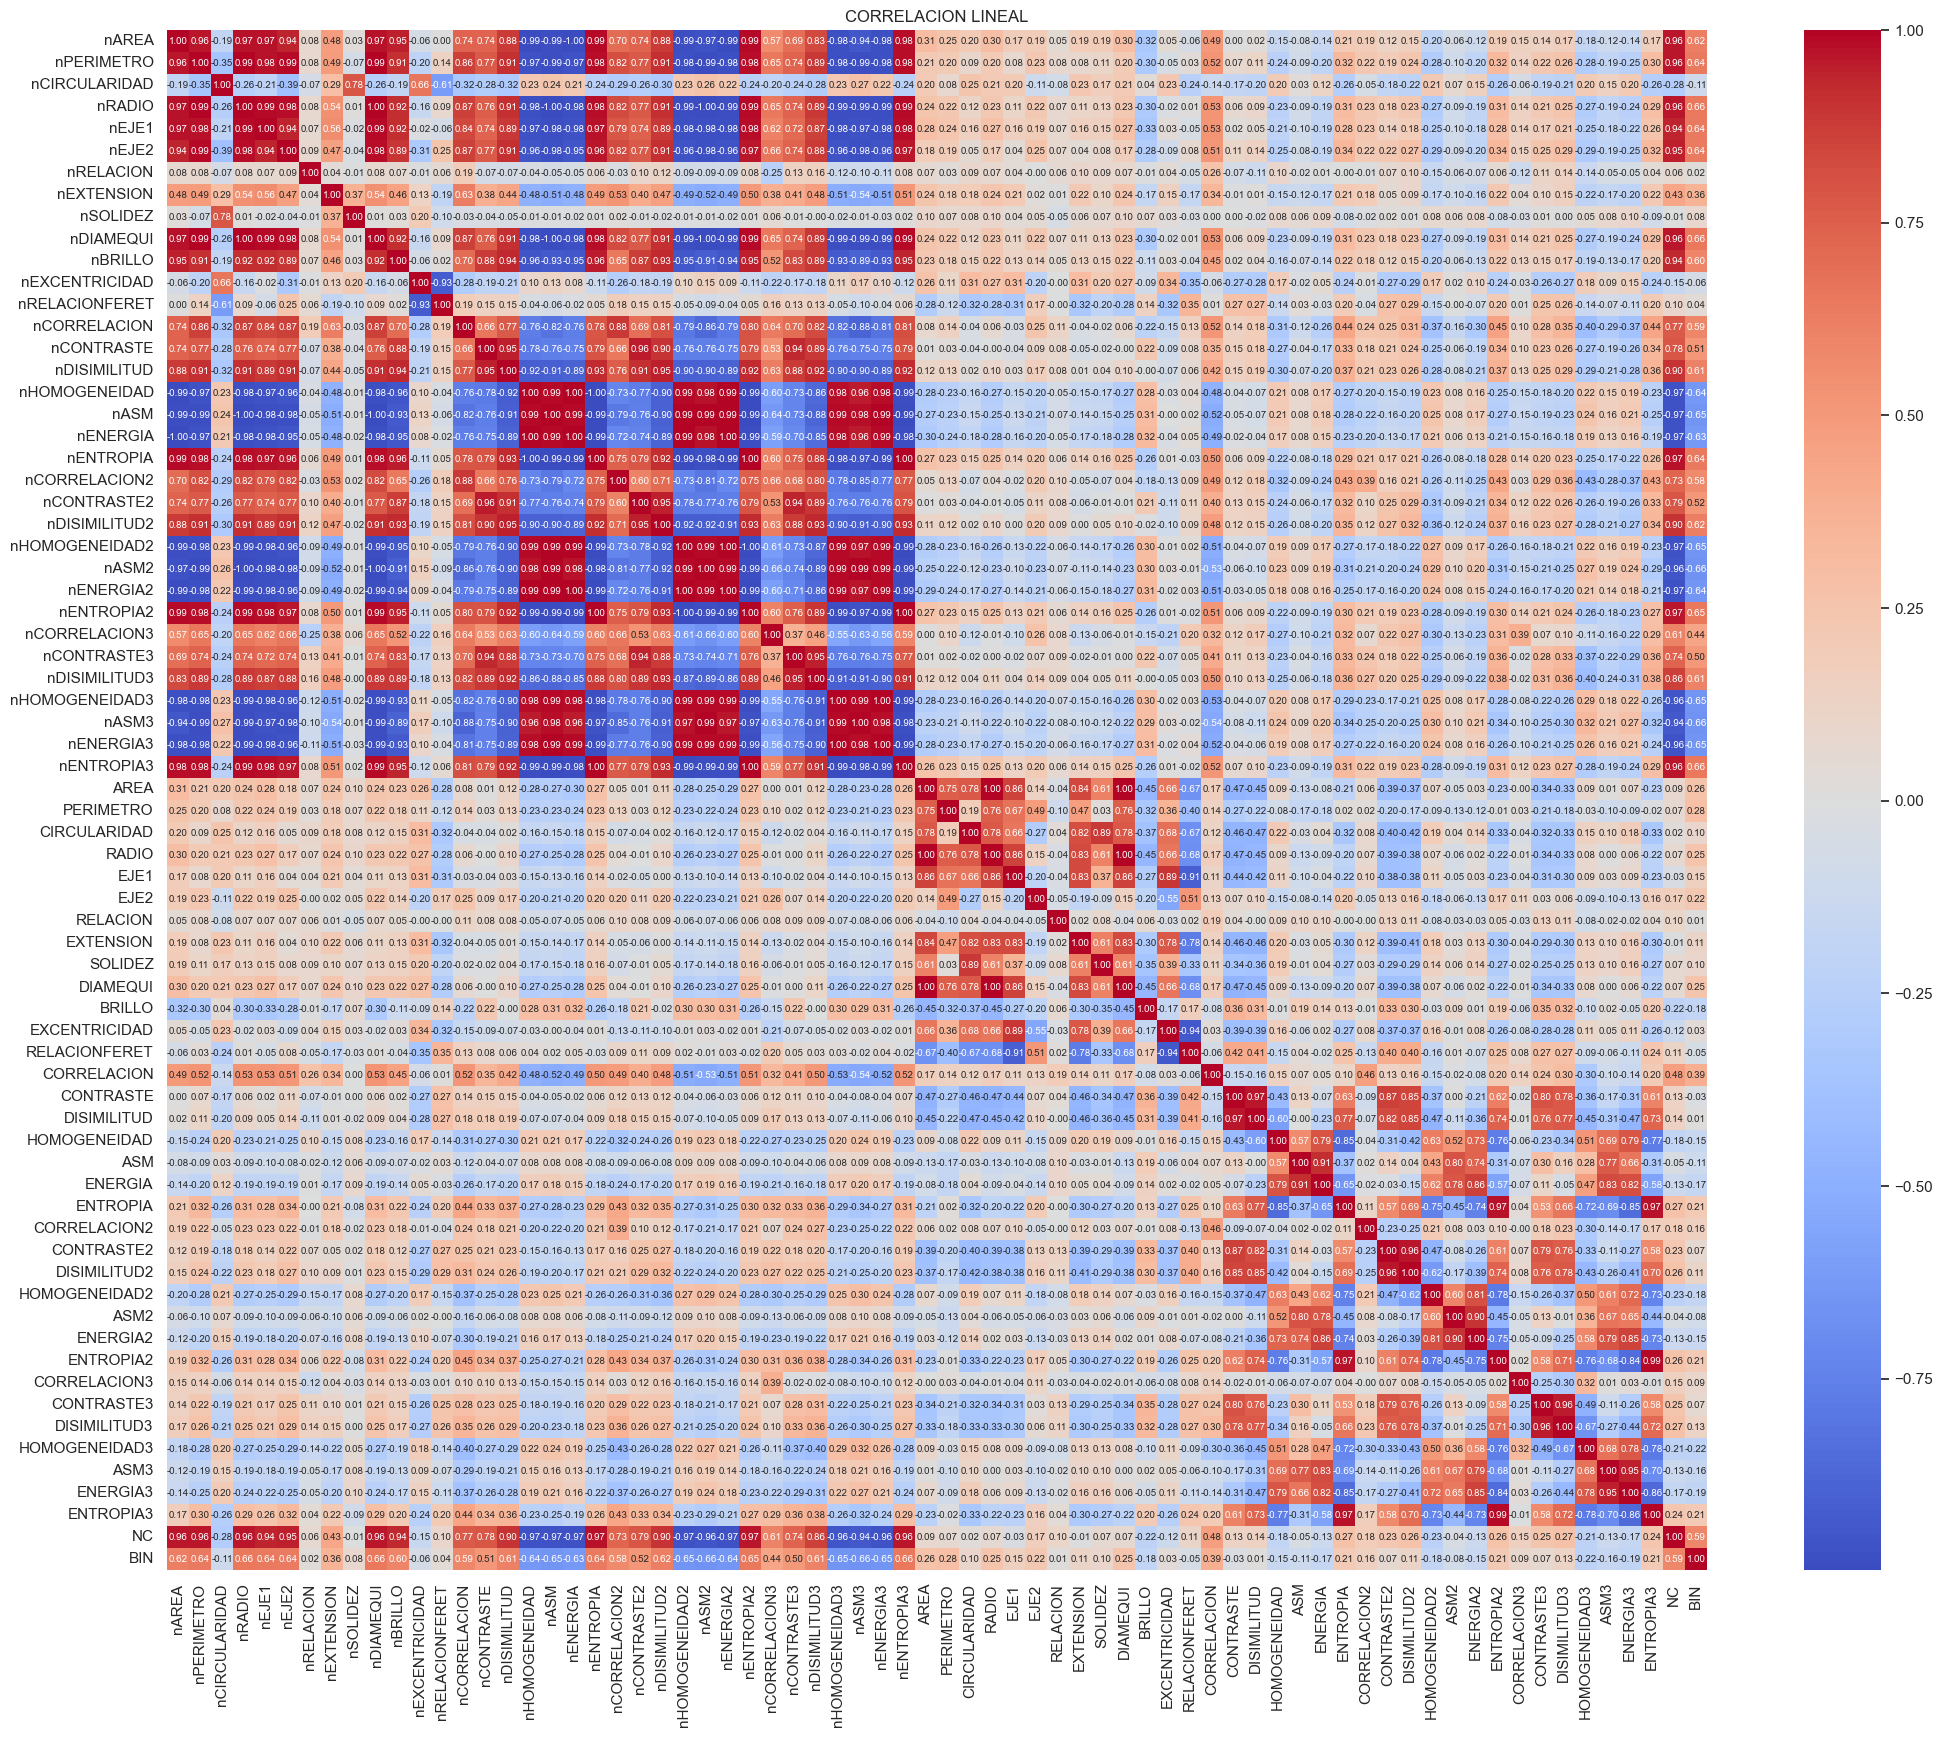

In [6]:
matrizCorrelacion = matrizCaract[matrizCaract.columns.drop(['HERLEV','CYT','HIST'])]
corr = matrizCorrelacion.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 7},
           xticklabels= matrizCorrelacion.columns, 
           yticklabels= matrizCorrelacion.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('CORRELACION LINEAL')
plt.show()

In [ ]:
#sns.pairplot(data= matrizCorrelacion[['nRADIO', 'nENERGIA3', 'RADIO', 'BRILLO', 'DISIMILITUD2', 'nSOLIDEZ', 'CORRELACION2', 'ENTROPIA', 'nRELACION', 'nCORRELACION3', 'DIAMEQUI', 'ASM2', 'SOLIDEZ','BIN']],hue='BIN',palette='dark')
sns.pairplot(data=matrizCorrelacion,hue='BIN',palette='dark')

In [ ]:
sns.pairplot(data= matrizCorrelacion[['nRADIO', 'nENERGIA3', 'RADIO', 'BRILLO', 'DISIMILITUD2','NC','HOMOGENEIDAD','nCORRELACION','BIN']],hue='BIN',palette='dark')

In [ ]:
plt.figure(figsize=(7,3),dpi=98)
sns.scatterplot(data=matrizCorrelacion, x='HOMOGENEIDAD',y='nCORRELACION',hue='BIN',palette='dark');

In [ ]:
plt.figure(figsize=(7,3),dpi=98)
fig = px.scatter_3d(matrizCorrelacion, x='HOMOGENEIDAD', y='nCORRELACION', z='HOMOGENEIDAD',color='BIN',)
fig.show()

# SELECCION DE CARACTERITICAS

### FEATUREWIZ

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (1401, 70)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
############################################

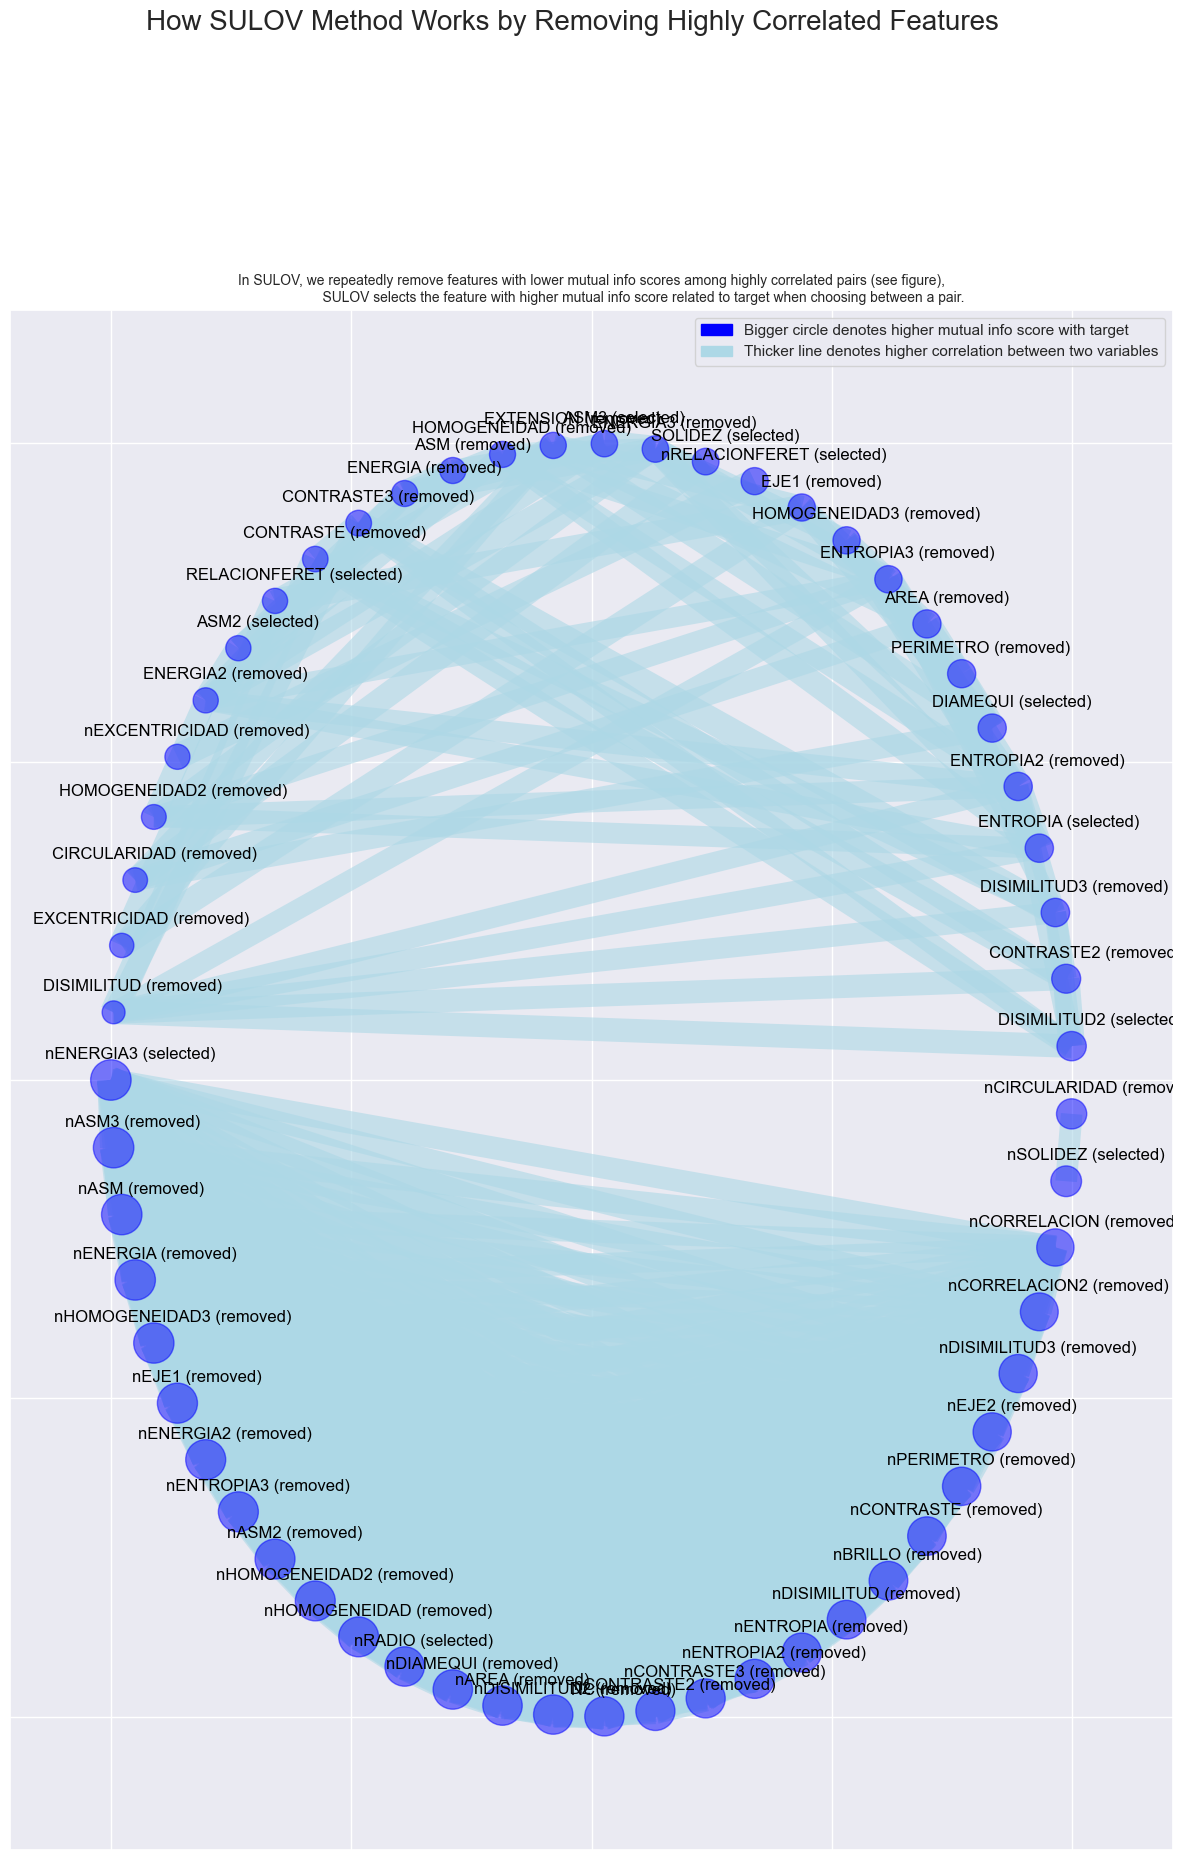

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 21
Final list of selected 21 vars after SULOV = ['BRILLO', 'CORRELACION', 'CORRELACION2', 'CORRELACION3', 'EJE2', 'RADIO', 'RELACION', 'nCORRELACION3', 'nEXTENSION', 'nRELACION', 'nENERGIA3', 'nRADIO', 'nSOLIDEZ', 'DISIMILITUD2', 'ENTROPIA', 'DIAMEQUI', 'nRELACIONFERET', 'SOLIDEZ', 'ASM3', 'RELACIONFERET', 'ASM2']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 21 
    Taking top 10 features per iteration...
    XGBoost version using 1.7.4 as tree method: hist
Number of booster rounds = 100
        using 21 variables...
Regu

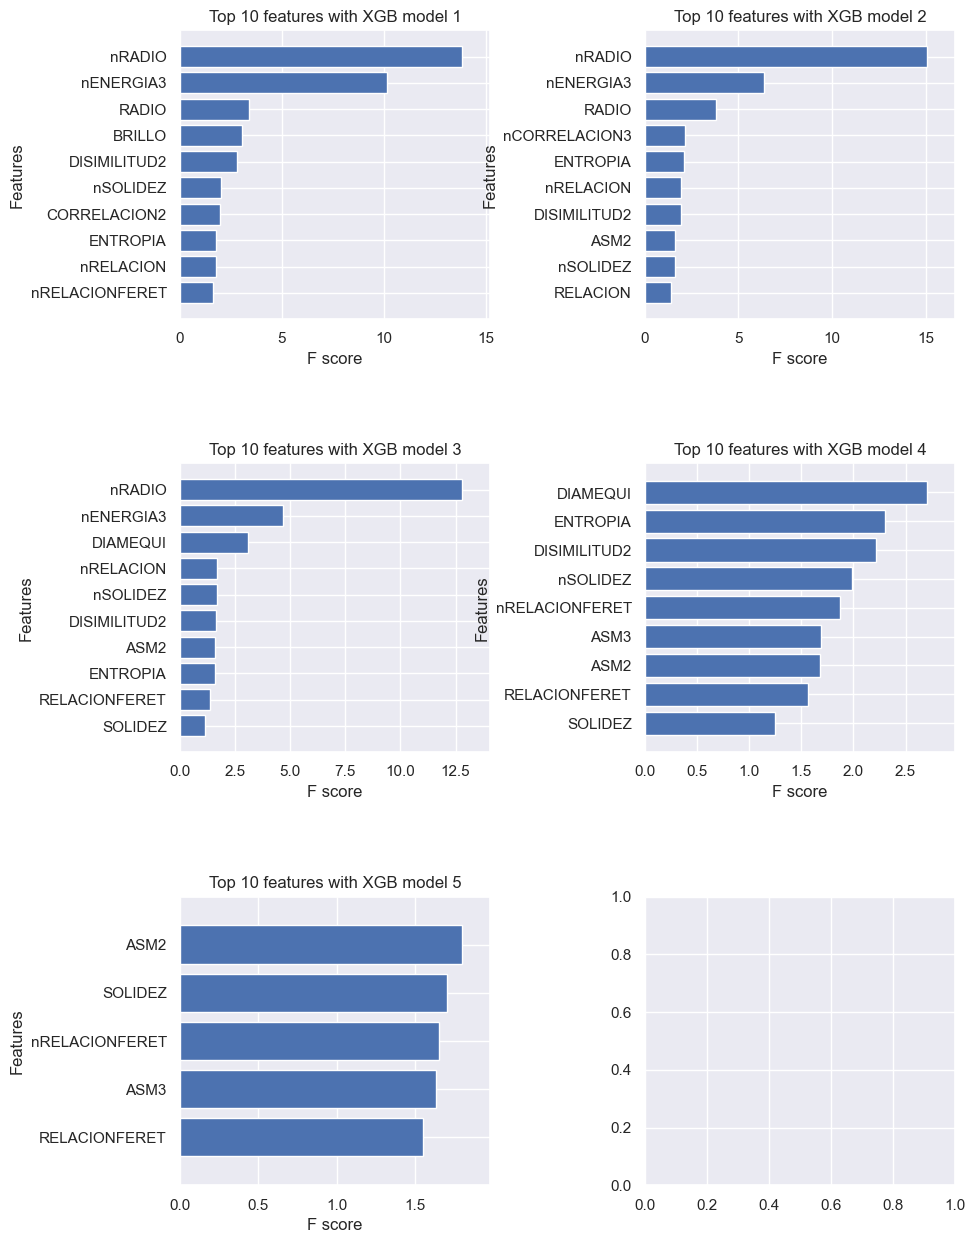

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 13 important features:
['nRADIO', 'nENERGIA3', 'RADIO', 'BRILLO', 'DISIMILITUD2', 'nSOLIDEZ', 'CORRELACION2', 'ENTROPIA', 'nRELACION', 'nCORRELACION3', 'DIAMEQUI', 'ASM2', 'SOLIDEZ']
Total Time taken for featurewiz selection = 6 seconds
Output contains a list of 13 important features and a train dataframe


In [7]:
features = featurewiz(matrizCorrelacion, target='BIN', corr_limit=0.70, 
                                verbose=4)

### PCA

In [ ]:
features[0]

In [8]:
#matriz = matrizCorrelacion[matrizCorrelacion.columns.drop(['BIN'])]
matriz= matrizCorrelacion[features[0]]

pca = PCA()
datos = pca.fit_transform(matriz)
#autovalores
print('variancia explicada por cada componente',pca.explained_variance_)
#proporcion
print('porporcion de la variancia explicada por cada componente',pca.explained_variance_ratio_)
print('suma de todas las proporiones',pca.explained_variance_ratio_.sum())

variancia explicada por cada componente [6.35232951e+00 3.77139396e+00 2.83061822e+00 9.83780764e-01
 9.56267653e-01 6.91088369e-01 5.90080983e-01 5.16107246e-01
 2.88364516e-01 1.10370048e-01 8.74301801e-02 9.53640838e-04
 3.72989366e-31]
porporcion de la variancia explicada por cada componente [3.69777576e-01 2.19537874e-01 1.64774063e-01 5.72671908e-02
 5.56656159e-02 4.02291760e-02 3.43494013e-02 3.00432914e-02
 1.67860832e-02 6.42478775e-03 5.08942743e-03 5.55127055e-05
 2.17122087e-32]
suma de todas las proporiones 0.9999999999999999


array([3.69777576e-01, 2.19537874e-01, 1.64774063e-01, 5.72671908e-02,
       5.56656159e-02, 4.02291760e-02, 3.43494013e-02, 3.00432914e-02,
       1.67860832e-02, 6.42478775e-03, 5.08942743e-03, 5.55127055e-05,
       2.17122087e-32])

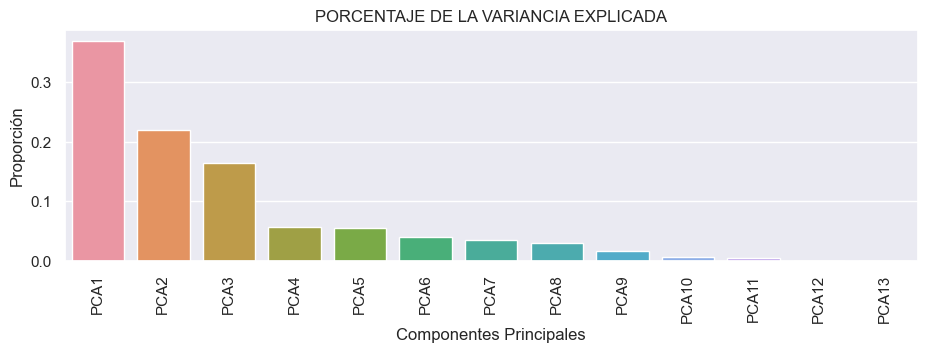

In [9]:
plt.figure(figsize=(11,3))
nomPCA = np.arange(len(pca.feature_names_in_))
nomPCA = ['PCA'+str(e+1)     for i,e in enumerate(nomPCA)]
sns.barplot(x=nomPCA,y= pca.explained_variance_ratio_)
plt.title('PORCENTAJE DE LA VARIANCIA EXPLICADA')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción')
plt.xticks(rotation = 90)
pca.explained_variance_ratio_

In [ ]:
varianzas = pca.explained_variance_ratio_
np.sum(varianzas[0:8])

In [10]:
dataPCA = pd.DataFrame(datos,columns=nomPCA)
#dataPCA['CYT'] = matrizCaract['CYT']
dataPCA['BIN'] = matrizCorrelacion['BIN']
#dataPCA['HIST'] = matrizCaract['HIST']
#dataPCA['HERLEV'] = matrizCaract['HERLEV']

In [ ]:
clase = 'BIN'
distPCA = dataPCA[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6',clase]]
#plt.figure(dpi=144)
sns.pairplot(distPCA,hue=clase,palette='dark')

PCA

In [13]:
dataPCA2 = dataPCA.values
X = dataPCA2[:,0:-2]
Y = dataPCA2[:,-1]
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [14]:
x_test.shape

(281, 12)

CARACTERITICAS

In [ ]:
features[0]

In [34]:
feat = features[0].copy()
feat.append('BIN')
matrizCorrelacion2 = matrizCorrelacion[feat].values
X = matrizCorrelacion2[:,0:-2]
Y = matrizCorrelacion2[:,-1]
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [ ]:
# matrizCorrelacion2 = matrizCorrelacion[['nEJE1', 'PERIMETRO', 'DISIMILITUD', 'HOMOGENEIDAD', 'EXTENSION', 'CORRELACION2','BIN']].values
# X = matrizCorrelacion2[:,0:-2]
# Y = matrizCorrelacion2[:,-1]
# x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

datos de entrenamiento y test

In [ ]:
#x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)

# ARBOLES DE DESICION

In [ ]:
# optimizando hiperparámetros
aTest = []
aTrain = []
prof = np.arange(1,40,1)
for p in prof:
    arb = DecisionTreeClassifier(max_depth=p,class_weight='balanced',random_state=0)
    arb.fit(x_train,y_train)
    y_train_predict = arb.predict(x_train)
    y_test_predict = arb.predict(x_test)
    scoreTrain = accuracy_score(y_train_predict,y_train)
    scoreTest = accuracy_score(y_test_predict,y_test)
    aTest.append(scoreTest)
    aTrain.append(scoreTrain)
    #print('PROF:',p ,'SCORETEST: ',scoreTest,'     SCORETRAIN: ',scoreTrain)
plt.figure(figsize=(7,3),dpi=98)
plt.plot(prof,aTrain,'-o',label='entrenamiento')
plt.plot(prof,aTest,'-o',label='validación')
plt.tight_layout()
#plt.ylim(0,1)
plt.xlim(min(prof),max(prof))
plt.title('OPTIMIZACION HIPERPARAMETROS ARBOL')
plt.xlabel('Profundidad')
plt.ylabel('Accuracy')
plt.legend()

porcentaje de aciertos sobre datos de entrenamiento 0.9982142857142857
porcentaje de aciertos sobre datos de test 0.9323843416370107
------------------------------------------------
EVALUACION SOBRE DATOS DE TEST
accuracy: 0.9323843416370107  precision: 0.8848484848484849  recall: 1.0  f1: 0.9389067524115756
------------------------------------------------
INFORME DE CLASIFICACION
              precision    recall  f1-score   support

      clase1       0.88      1.00      0.94       146
      clase2       1.00      0.86      0.92       135

    accuracy                           0.93       281
   macro avg       0.94      0.93      0.93       281
weighted avg       0.94      0.93      0.93       281



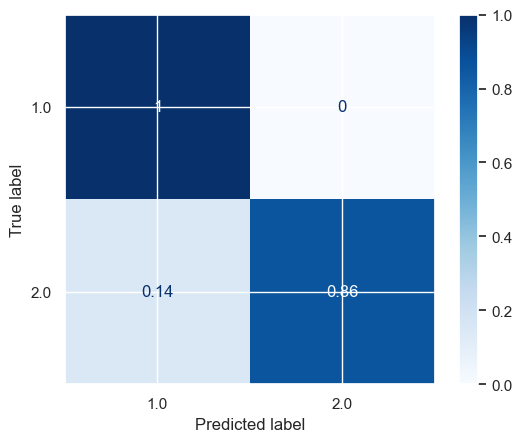

In [23]:
arbol = DecisionTreeClassifier(max_depth=14,class_weight='balanced',random_state=0)
arbol.fit(x_train,y_train)
y_train_predict = arbol.predict(x_train)
y_test_predict = arbol.predict(x_test)
y_test_predict_prob = arbol.predict_proba(x_test)
print('porcentaje de aciertos sobre datos de entrenamiento',accuracy_score(y_train_predict,y_train))
print('porcentaje de aciertos sobre datos de test',accuracy_score(y_test_predict,y_test))
cm = confusion_matrix(y_true=y_test,y_pred=y_test_predict,normalize='true')
matriz  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
matriz.plot(cmap='Blues')

print('------------------------------------------------')
accuracy = accuracy_score(y_test,y_test_predict)
precision = precision_score(y_test,y_test_predict)
recall = recall_score(y_test,y_test_predict)                            
f1 = f1_score(y_test,y_test_predict)
print('EVALUACION SOBRE DATOS DE TEST')
print('accuracy:',accuracy,' precision:',precision,' recall:',recall,' f1:',f1)

# informe de clasificacion
print('------------------------------------------------')
target_names = ['clase1','clase2']
print('INFORME DE CLASIFICACION')
print(classification_report(y_test, y_test_predict, target_names=target_names))

In [ ]:
print('Area bajo la curva ROC: ', roc_auc_score(y_true=y_test,y_score=y_test_predict_prob[:,1]))
tfp, tvp, umbral = roc_curve(y_test,y_test_predict_prob[:,1],pos_label=2)
roc_auc= auc(tfp, tvp)
#plotting  
plt.figure(figsize=(7,3),dpi=98) 
plt.plot(tfp, tvp, linestyle='--',label='AUC '+str(np.round(roc_auc,2)))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

Evaluacion con validacion cruzada

In [ ]:
treeTrainScoresMean = []
treeTrainScoresStd = []
treeTestScoresMean = []
treeTestScoresStd = []
profund = np.arange(1,21,1)
for p in profund:
    arbol  = DecisionTreeClassifier(max_depth=p,class_weight='balanced',random_state=0)
    treeScores = cross_validate(arbol, x_train,y_train,cv=5,return_train_score=True)
    treeTrainScoresMean.append(treeScores['train_score'].mean())
    treeTrainScoresStd.append(treeScores['train_score'].std())
    treeTestScoresMean.append(treeScores['test_score'].mean())
    treeTestScoresStd.append(treeScores['test_score'].std())

treeTrainScoresMean = np.array(treeTrainScoresMean)
treeTrainScoresStd = np.array(treeTrainScoresStd)
treeTestScoresMean = np.array(treeTestScoresMean)
treeTestScoresStd = np.array(treeTestScoresStd)
plt.figure(figsize=(7,3),dpi=98)
plt.fill_between(profund, treeTrainScoresMean - treeTrainScoresStd,
                 treeTrainScoresMean + treeTrainScoresStd, alpha=0.1,
                 color="r")
plt.fill_between(profund, treeTestScoresMean - treeTestScoresStd,
                 treeTestScoresMean + treeTestScoresStd, alpha=0.1, color="g")

plt.plot(profund, treeTrainScoresMean, 'o-', color="r",
         label="Training score")
plt.plot(profund, treeTestScoresMean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [24]:
arbol = DecisionTreeClassifier(max_depth=14,class_weight='balanced',random_state=0)
scores = cross_val_score(arbol,x_train,y_train,cv=5,scoring='accuracy')
print('RESULTADOS')
print('puntaje por iteracion: ',scores, ' media:',scores.mean())

RESULTADOS
puntaje por iteracion:  [0.88839286 0.875      0.88392857 0.88392857 0.92857143]  media: 0.8919642857142858


# MAQUINAS DE SOPORTE VECTORIAL

In [ ]:
# optimizando hiperparámetros
aTest = []
aTrain = []
valor = np.arange(0.1,21,0.1)
for p in valor:
    msv = SVC(kernel='poly',C=p,class_weight='balanced',random_state=0,probability=True).fit(x_train,y_train);
    y_train_predict = msv.predict(x_train);
    y_test_predict = msv.predict(x_test);
    scoreTrain = accuracy_score(y_train_predict,y_train)
    scoreTest = accuracy_score(y_test_predict,y_test)
    aTest.append(scoreTest)
    aTrain.append(scoreTrain)
    #print('PROF:',p ,'SCORETEST: ',scoreTest,'     SCORETRAIN: ',scoreTrain)

plt.figure(figsize=(7,3),dpi=98)
plt.plot(valor,aTrain,'-o',label='train')
plt.plot(valor,aTest,'-o',label = 'test')
plt.tight_layout()
#plt.ylim(0.5,1)
plt.xlim(min(valor),max(valor))
plt.xlabel('Parámetro C ')
plt.ylabel('Accuracy')
plt.legend()
plt.title('OPTIMIZACION HIPERPARAMETROS SVM')

porcentaje de aciertos sobre datos de entrenamiento 0.8821428571428571
porcentaje de aciertos sobre datos de test 0.8683274021352313
------------------------------------------------
EVALUACION SOBRE DATOS DE TEST
accuracy: 0.8683274021352313  precision: 0.943089430894309  recall: 0.7945205479452054  f1: 0.8624535315985131
------------------------------------------------
INFORME DE CLASIFICACION
              precision    recall  f1-score   support

      clase1       0.94      0.79      0.86       146
      clase2       0.81      0.95      0.87       135

    accuracy                           0.87       281
   macro avg       0.88      0.87      0.87       281
weighted avg       0.88      0.87      0.87       281



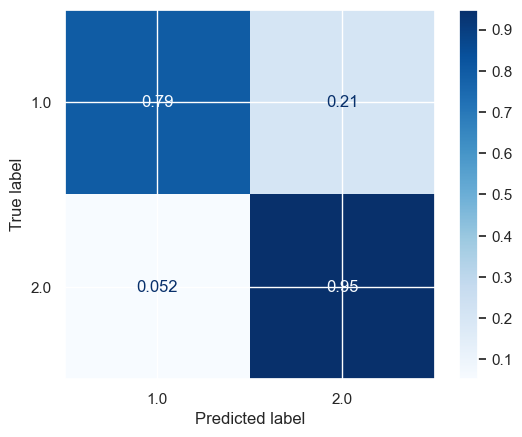

In [25]:
msv = SVC(kernel='poly',C=5,class_weight='balanced',probability=True,random_state=0).fit(x_train,y_train)
y_train_predict = msv.predict(x_train)
y_test_predict = msv.predict(x_test)
y_test_predict_prob = msv.predict_proba(x_test)
print('porcentaje de aciertos sobre datos de entrenamiento',accuracy_score(y_train_predict,y_train))
print('porcentaje de aciertos sobre datos de test',accuracy_score(y_test_predict,y_test))
cm = confusion_matrix(y_true=y_test,y_pred=y_test_predict, normalize='true')
matriz  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=msv.classes_)
matriz.plot(cmap='Blues')

print('------------------------------------------------')
accuracy = accuracy_score(y_test,y_test_predict)
precision = precision_score(y_test,y_test_predict)
recall = recall_score(y_test,y_test_predict)                            
f1 = f1_score(y_test,y_test_predict)
print('EVALUACION SOBRE DATOS DE TEST')
print('accuracy:',accuracy,' precision:',precision,' recall:',recall,' f1:',f1)

# informe de clasificacion
print('------------------------------------------------')
target_names = ['clase1','clase2']
print('INFORME DE CLASIFICACION')
print(classification_report(y_test, y_test_predict, target_names=target_names))

In [ ]:
print('Area bajo la curva ROC: ', roc_auc_score(y_true=y_test,y_score=y_test_predict_prob[:,1]))
tfp, tvp, umbral = roc_curve(y_test,y_test_predict_prob[:,1],pos_label=2)
roc_auc= auc(tfp, tvp)
#plotting  
plt.figure(figsize=(7,3),dpi=98) 
plt.plot(tfp, tvp, linestyle='--',label='AUC '+str(np.round(roc_auc,2)))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
msvTrainScoresMean = []
msvTrainScoresStd = []
msvTestScoresMean = []
msvTestScoresStd = []
valor = np.arange(0.1,20,0.1)
for p in valor:

    msv = SVC(kernel='poly',C=p,class_weight='balanced',probability=True,random_state=0)
    msvScores = cross_validate(msv, x_train,y_train,cv=5,return_train_score=True)
    msvTrainScoresMean.append(msvScores['train_score'].mean())
    msvTrainScoresStd.append(msvScores['train_score'].std())
    msvTestScoresMean.append(msvScores['test_score'].mean())
    msvTestScoresStd.append(msvScores['test_score'].std())

msvTrainScoresMean = np.array(msvTrainScoresMean)
msvTrainScoresStd = np.array(msvTrainScoresStd)
msvTestScoresMean = np.array(msvTestScoresMean)
msvTestScoresStd = np.array(msvTestScoresStd)
plt.figure(figsize=(7,3),dpi=98)
plt.fill_between(valor, msvTrainScoresMean - msvTrainScoresStd,
                 msvTrainScoresMean + msvTrainScoresStd, alpha=0.1,
                 color="r")
plt.fill_between(valor, msvTestScoresMean - msvTestScoresStd,
                 msvTestScoresMean + msvTestScoresStd, alpha=0.1, color="g")

plt.plot(valor, msvTrainScoresMean, 'o-', color="r",
         label="Training score")
plt.plot(valor, msvTestScoresMean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Parámetro C MSV')
plt.show()

In [26]:
msv = SVC(kernel='poly',C=5,class_weight='balanced',probability=True,random_state=0)
scores = cross_val_score(msv,x_train,y_train,cv=5,scoring='accuracy')
print('RESULTADOS')
print('puntaje por iteracion: ',scores, ' media:',scores.mean())

RESULTADOS
puntaje por iteracion:  [0.85267857 0.83482143 0.84375    0.83035714 0.84821429]  media: 0.8419642857142857


# KNN K_VECINOS

In [ ]:
# optimizando hiperparámetros
aTest = []
aTrain = []
valor = np.arange(1,50,1)
for p in valor:
    knn = KNeighborsClassifier(n_neighbors=p,weights='distance').fit(x_train,y_train)
    y_train_predict = knn.predict(x_train)
    y_test_predict = knn.predict(x_test)
    scoreTrain = accuracy_score(y_train_predict,y_train)
    scoreTest = accuracy_score(y_test_predict,y_test)
    aTest.append(scoreTest)
    aTrain.append(scoreTrain)
    #print('PROF:',p ,'SCORETEST: ',scoreTest,'     SCORETRAIN: ',scoreTrain)
plt.figure(figsize=(7,3),dpi=98)
plt.plot(valor,aTrain,'-o',label='train')
plt.plot(valor,aTest,'-o',label='test')
plt.tight_layout()
plt.legend()
#plt.ylim(0,1)
plt.xlim(min(valor),max(valor))
plt.title('OPTIMIZACION HIPERPARAMETROS KNN')
plt.xlabel('k vecinos')
plt.ylabel('Accuracy')

porcentaje de aciertos sobre datos de entrenamiento 1.0
porcentaje de aciertos sobre datos de test 0.9501779359430605
------------------------------------------------
EVALUACION SOBRE DATOS DE TEST
accuracy: 0.9501779359430605  precision: 0.9285714285714286  recall: 0.9794520547945206  f1: 0.9533333333333334
------------------------------------------------
INFORME DE CLASIFICACION
              precision    recall  f1-score   support

      clase1       0.93      0.98      0.95       146
      clase2       0.98      0.92      0.95       135

    accuracy                           0.95       281
   macro avg       0.95      0.95      0.95       281
weighted avg       0.95      0.95      0.95       281



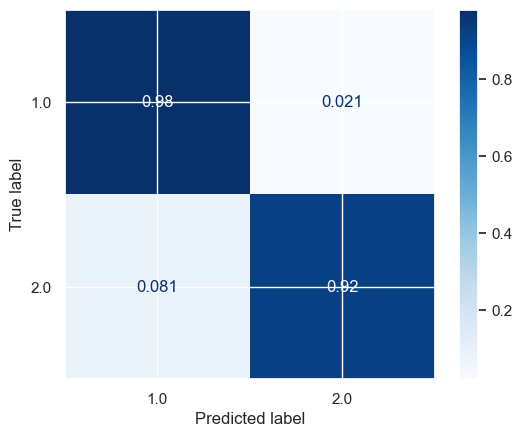

In [15]:
knn = KNeighborsClassifier(n_neighbors=32,weights='distance').fit(x_train,y_train)
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)
y_test_predict_prob = knn.predict_proba(x_test)
print('porcentaje de aciertos sobre datos de entrenamiento',accuracy_score(y_train_predict,y_train))
print('porcentaje de aciertos sobre datos de test',accuracy_score(y_test_predict,y_test))
cm = confusion_matrix(y_true=y_test,y_pred=y_test_predict,normalize='true')
matriz  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
matriz.plot(cmap='Blues')

print('------------------------------------------------')
accuracy = accuracy_score(y_test,y_test_predict)
precision = precision_score(y_test,y_test_predict)
recall = recall_score(y_test,y_test_predict)                            
f1 = f1_score(y_test,y_test_predict)
print('EVALUACION SOBRE DATOS DE TEST')
print('accuracy:',accuracy,' precision:',precision,' recall:',recall,' f1:',f1)

# informe de clasificacion
print('------------------------------------------------')
target_names = ['clase1','clase2']
print('INFORME DE CLASIFICACION')
print(classification_report(y_test, y_test_predict, target_names=target_names))

In [ ]:
print('Area bajo la curva ROC: ', roc_auc_score(y_true=y_test,y_score=y_test_predict_prob[:,1]))
tfp, tvp, umbral = roc_curve(y_test,y_test_predict_prob[:,1],pos_label=2)
roc_auc= auc(tfp, tvp)
#plotting  
plt.figure(figsize=(7,3),dpi=98) 
plt.plot(tfp, tvp, linestyle='--',label='AUC '+str(np.round(roc_auc,2)))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
knnTrainScoresMean = []
knnTrainScoresStd = []
knnTestScoresMean = []
knnTestScoresStd = []
valor = np.arange(1,50,1)
for p in valor:
    knn = KNeighborsClassifier(n_neighbors=p,weights='distance').fit(x_train,y_train)
    knnScores = cross_validate(knn, x_train,y_train,cv=5,return_train_score=True)
    knnTrainScoresMean.append(knnScores['train_score'].mean())
    knnTrainScoresStd.append(knnScores['train_score'].std())
    knnTestScoresMean.append(knnScores['test_score'].mean())
    knnTestScoresStd.append(knnScores['test_score'].std())

knnTrainScoresMean = np.array(knnTrainScoresMean)
knnTrainScoresStd = np.array(knnTrainScoresStd)
knnTestScoresMean = np.array(knnTestScoresMean)
knnTestScoresStd = np.array(knnTestScoresStd)

plt.fill_between(valor, knnTrainScoresMean - knnTrainScoresStd,
                 knnTrainScoresMean + knnTrainScoresStd, alpha=0.1,
                 color="r")
plt.fill_between(valor, knnTestScoresMean - knnTestScoresStd,
                 knnTestScoresMean + knnTestScoresStd, alpha=0.1, color="g")

plt.plot(valor, knnTrainScoresMean, 'o-', color="r",
         label="Training score")
plt.plot(valor, knnTestScoresMean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('K vecinos')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=32,weights='distance').fit(x_train,y_train)
scores = cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
print('RESULTADOS')
print('puntaje por iteracion: ',scores, ' media:',scores.mean())

# REDES NEURONALES

In [ ]:
# optimizando hiperparámetros
aTest = []
aTrain = []
valor = np.arange(5,60,1)
for p in valor:
    red = MLPClassifier(random_state = 0,max_iter=100,hidden_layer_sizes=(100,80,p),activation='relu',solver='adam').fit(x_train,y_train)
    y_train_predict = red.predict(x_train);
    y_test_predict = red.predict(x_test);
    scoreTrain = accuracy_score(y_train_predict,y_train)
    scoreTest = accuracy_score(y_test_predict,y_test)
    aTest.append(scoreTest)
    aTrain.append(scoreTrain)
    #print('PROF:',p ,'SCORETEST: ',scoreTest,'     SCORETRAIN: ',scoreTrain)

plt.figure(figsize=(7,3),dpi=98)
plt.plot(valor,aTrain,'-o',label='train')
plt.plot(valor,aTest,'-o',label='test')
plt.tight_layout()
#plt.ylim(0.5,1)
plt.xlim(min(valor),max(valor))
plt.xlabel('Neuronas capa oculta 3 ')
plt.ylabel('Accuracy')
plt.legend()

porcentaje de aciertos sobre datos de entrenamiento 1.0
porcentaje de aciertos sobre datos de test 0.9857651245551602
------------------------------------------------
EVALUACION SOBRE DATOS DE TEST
accuracy: 0.9857651245551602  precision: 0.9733333333333334  recall: 1.0  f1: 0.9864864864864865
------------------------------------------------
INFORME DE CLASIFICACION
              precision    recall  f1-score   support

      clase1       0.97      1.00      0.99       146
      clase2       1.00      0.97      0.98       135

    accuracy                           0.99       281
   macro avg       0.99      0.99      0.99       281
weighted avg       0.99      0.99      0.99       281



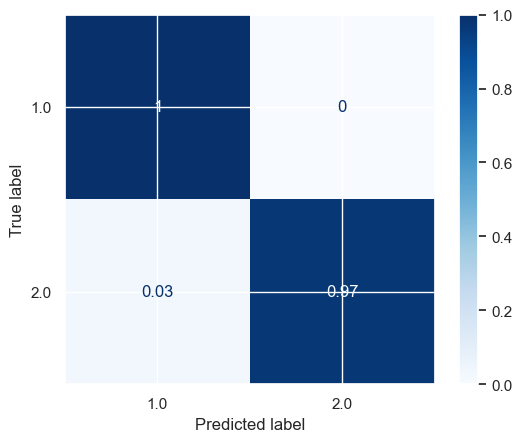

In [16]:
red = MLPClassifier(random_state = 0,max_iter=100,hidden_layer_sizes=(100,80,54),activation='relu',solver='adam').fit(x_train,y_train)

y_train_predict = red.predict(x_train)
y_test_predict = red.predict(x_test)
y_test_predict_prob = red.predict_proba(x_test)
print('porcentaje de aciertos sobre datos de entrenamiento',accuracy_score(y_train_predict,y_train))
print('porcentaje de aciertos sobre datos de test',accuracy_score(y_test_predict,y_test))
cm = confusion_matrix(y_true=y_test,y_pred=y_test_predict,normalize='true')
matriz  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=red.classes_)
matriz.plot(cmap='Blues')

print('------------------------------------------------')
accuracy = accuracy_score(y_test,y_test_predict)
precision = precision_score(y_test,y_test_predict)
recall = recall_score(y_test,y_test_predict)                            
f1 = f1_score(y_test,y_test_predict)
print('EVALUACION SOBRE DATOS DE TEST')
print('accuracy:',accuracy,' precision:',precision,' recall:',recall,' f1:',f1)

# informe de clasificacion
print('------------------------------------------------')
target_names = ['clase1','clase2']
print('INFORME DE CLASIFICACION')
print(classification_report(y_test, y_test_predict, target_names=target_names))

Area bajo la curva ROC:  0.9921867072552003


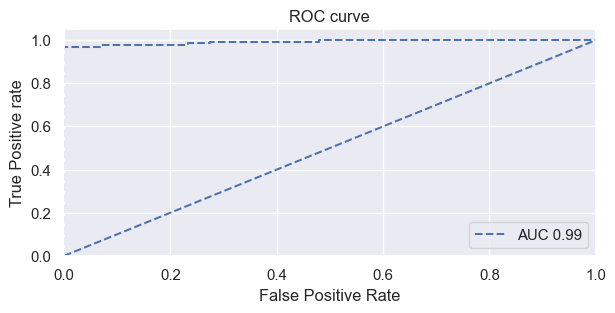

In [17]:
print('Area bajo la curva ROC: ', roc_auc_score(y_true=y_test,y_score=y_test_predict_prob[:,1]))
tfp, tvp, umbral = roc_curve(y_test,y_test_predict_prob[:,1],pos_label=2)
roc_auc= auc(tfp, tvp)
#plotting  
plt.figure(figsize=(7,3),dpi=98) 
plt.plot(tfp, tvp, linestyle='--',label='AUC '+str(np.round(roc_auc,2)))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
redTrainScoresMean = []
redTrainScoresStd = []
redTestScoresMean = []
redTestScoresStd = []
valor = np.arange(10,60,1)
for p in valor:
    red = MLPClassifier(random_state = 0,max_iter=100,hidden_layer_sizes=(100,80,p),activation='relu',solver='adam')
    redScores = cross_validate(red, x_train,y_train,cv=5,return_train_score=True)
    redTrainScoresMean.append(redScores['train_score'].mean())
    redTrainScoresStd.append(redScores['train_score'].std())
    redTestScoresMean.append(redScores['test_score'].mean())
    redTestScoresStd.append(redScores['test_score'].std())

redTrainScoresMean = np.array(redTrainScoresMean)
redTrainScoresStd = np.array(redTrainScoresStd)
redTestScoresMean = np.array(redTestScoresMean)
redTestScoresStd = np.array(redTestScoresStd)

plt.fill_between(valor,redTrainScoresMean - redTrainScoresStd,
                 redTrainScoresMean + redTrainScoresStd, alpha=0.1,
                 color="r")
plt.fill_between(valor, redTestScoresMean - redTestScoresStd,
                 redTestScoresMean + redTestScoresStd, alpha=0.1, color="g")

plt.plot(valor, redTrainScoresMean, 'o-', color="r",
         label="Training score")
plt.plot(valor, redTestScoresMean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Perceptron Multicapa (neuronas 3er capa oculta)')
plt.show()

In [33]:
red = MLPClassifier(random_state = 0,max_iter=100,hidden_layer_sizes=(100,80,54),activation='relu',solver='adam')
scores = cross_val_score(red,x_train,y_train,cv=5,scoring='accuracy')
print('RESULTADOS')
print('puntaje por iteracion: ',scores, ' media:',scores.mean())

RESULTADOS
puntaje por iteracion:  [0.96428571 0.9375     0.94196429 0.91517857 0.91964286]  media: 0.9357142857142856


In [ ]:
98.57-93.57

In [ ]:
97.86-92.85